In [1]:
from ase.calculators.vasp import VaspChargeDensity
import os
import numpy
import from_xas_modules
import math

In [9]:
str_comput_110=os.environ['goto_pto_comput_110']
str_chdir = str_comput_110+'Pt.110.x2y3z4.5_O1_vac15/vasp_sch/atom_1/'
os.chdir(str_chdir)
print(os.getcwd())

/home/faye/comput/202103_XasPtO/server/Pt.110_O_vac/Pt.110.x2y3z4.5_O1_vac15/vasp_sch/atom_1


In [10]:
obj_chgcar = VaspChargeDensity(filename='peak_1/WFN_SQUARED_B0271_K0006.vasp')
obj_atoms = obj_chgcar.atoms[0]
array3d_chg = obj_chgcar.chg[0]

In [11]:
float_chg_sum=numpy.sum(array3d_chg)
from_xas_modules.def_print_paras( locals(), ['float_chg_sum'] )

array1d_cell_grid=numpy.array(numpy.shape(array3d_chg))
from_xas_modules.def_print_paras( locals(), ['array1d_cell_grid'] )

array1d_cell_gridhalf= array1d_cell_grid / 2
from_xas_modules.def_print_paras( locals(), ['array1d_cell_gridhalf'] )

int_ngrid = 1
for int_i in array1d_cell_grid:
    int_ngrid *= int_i
from_xas_modules.def_print_paras( locals(), ['int_ngrid'] )

float_volume=atoms.get_volume()
from_xas_modules.def_print_paras( locals(), ['float_volume'] )

float_vol1grid = float_volume/int_ngrid
from_xas_modules.def_print_paras( locals(), ['float_vol1grid'] )

float_chgsum_t_vol1grid = float_chg*float_volslice
from_xas_modules.def_print_paras( locals(), ['float_chgsum_t_vol1grid'] )

float_chgsum_t_volume = float_chg*float_volume
from_xas_modules.def_print_paras( locals(), ['float_chgsum_t_volume'] )

{
    "float_chg_sum": 0.0005525695333523424
}
{
    "array1d_cell_grid": [
        "numpy.ndarray",
        [
            199,
            211,
            678
        ]
    ]
}
{
    "array1d_cell_gridhalf": [
        "numpy.ndarray",
        [
            99.5,
            105.5,
            339.0
        ]
    ]
}
{
    "int_ngrid": [
        "numpy.integer",
        28468542
    ]
}
{
    "float_volume": 1809.7270137148748
}
{
    "float_vol1grid": 6.356936065481945e-05
}
{
    "float_chgsum_t_vol1grid": 3.512649195254033e-08
}
{
    "float_chgsum_t_volume": 1.0000000114635565
}


In [18]:
array1d_atom1pos = obj_atoms.get_positions()[0]
from_xas_modules.def_print_paras( locals(), ['array1d_atom1pos'] )

array1d_cell = obj_atoms.cell.cellpar()[0:3]
from_xas_modules.def_print_paras( locals(), ['array1d_cell'] )

array1d_gridpara = array1d_cell/array1d_cell_grid
from_xas_modules.def_print_paras( locals(), ['array1d_gridpara'] )

array1d_atom1pos_grid = array1d_atom1pos/array1d_gridpara
from_xas_modules.def_print_paras( locals(), ['array1d_atom1pos_grid'] )

float_r0_origin = 2.99

float_slice = 0.04
from_xas_modules.def_print_paras( locals(), ['float_slice'] )

int_nslice = int(float_r0 // float_slice)+1
from_xas_modules.def_print_paras( locals(), ['int_nslice'] )
array1d_rdf = numpy.zeros( shape=(int_nslice) )

float_r0 = float_slice * int_nslice
from_xas_modules.def_print_paras( locals(), ['float_r0'] )

array1d_r0_grid = float_r0/array1d_gridpara
from_xas_modules.def_print_paras( locals(), ['array1d_r0_grid'] )

array1d_sort = numpy.argsort( array1d_cell_grid )
from_xas_modules.def_print_paras( locals(), ['array1d_sort'] )

{
    "array1d_atom1pos": [
        "numpy.ndarray",
        [
            1.2756119928682728,
            1.4026370280527225,
            12.73790556498833
        ]
    ]
}
{
    "array1d_cell": [
        "numpy.ndarray",
        [
            7.934514,
            8.415822,
            27.101679
        ]
    ]
}
{
    "array1d_gridpara": [
        "numpy.ndarray",
        [
            0.039871929648241204,
            0.03988541232227488,
            0.039972977876106194
        ]
    ]
}
{
    "array1d_atom1pos_grid": [
        "numpy.ndarray",
        [
            31.992732835405707,
            35.16666736999956,
            318.662912842488
        ]
    ]
}
{
    "float_slice": 0.04
}
{
    "int_nslice": 75
}
{
    "float_r0": 3.0
}
{
    "array1d_r0_grid": [
        "numpy.ndarray",
        [
            75.24090322356228,
            75.2154691484682,
            75.05070073333833
        ]
    ]
}
{
    "array1d_sort": [
        "numpy.ndarray",
        [
            0,
 

In [34]:
int_sort0 = array1d_sort[0]
int_sort1 = array1d_sort[1]
int_sort2 = array1d_sort[2]

array1d_dist_grid = numpy.empty( shape=(3) )

array1d_grid = numpy.empty( shape=(3), dtype=int )

for array1d_grid[ int_sort2 ] in range( array1d_cell_grid[ int_sort2 ] ):
    array1d_dist_grid[ int_sort2 ] = ( array1d_grid[ int_sort2 ] - array1d_atom1pos_grid[ int_sort2 ] ) % array1d_cell_gridhalf[ int_sort2 ]
    if (array1d_dist_grid[ int_sort2 ] > array1d_r0_grid[ int_sort2 ] ): continue
    for array1d_grid[ int_sort1 ] in range( array1d_cell_grid[ int_sort1 ] ):
        array1d_dist_grid[ int_sort1 ] = ( array1d_grid[ int_sort1 ] - array1d_atom1pos_grid[ int_sort1 ] ) % array1d_cell_gridhalf[ int_sort1 ]
        if (array1d_dist_grid[ int_sort1 ] > array1d_r0_grid[ int_sort1 ]): continue
        for array1d_grid[ int_sort0 ] in range( array1d_cell_grid[ int_sort0 ] ):
            array1d_dist_grid[ int_sort0 ] = ( array1d_grid[ int_sort0 ] - array1d_atom1pos_grid[ int_sort0 ] ) % array1d_cell_gridhalf[ int_sort0 ]
            if (array1d_dist_grid[ int_sort0 ] > array1d_r0_grid[ int_sort0 ]): continue
            array1d_dist = array1d_dist_grid * array1d_gridpara
            float_dist = numpy.sqrt( array1d_dist.dot( array1d_dist ) )
            if (float_dist >= float_r0): continue
            int_temp = int( float_dist // float_slice)
            array1d_rdf[ int_temp ] += array3d_chg[ array1d_grid[0], array1d_grid[1], array1d_grid[2] ]

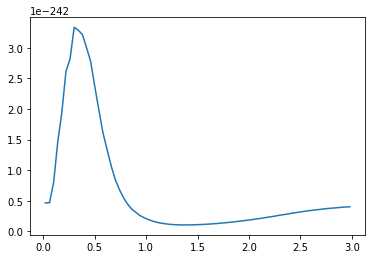

In [36]:
array1d_r = numpy.linspace( 0, float_r0, num=int_nslice, endpoint=False )
for int_i in range( int_nslice ):
    array1d_rdf[int_i] /= 3*int_i**2 + 3*int_i + 1
array1d_rdf /= 4/3 * math.pi * float_slice**3
array1d_rdf *= float_volume**2

array1d_r += float_slice/2

import matplotlib.pyplot as plt

plt.plot( array1d_r, array1d_rdf )